In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [6]:
# View all of the classes that automap found


In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
# print(recent_data)
print(latest_date)

2017-08-23


In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017,8,23) - dt.timedelta(days = 365)
print(query_date)

# Perform a query to retrieve the data and precipitation scores
recent_12_months = session.query(Measurement.station,Measurement.date,Measurement.prcp).filter(Measurement.date > query_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(recent_12_months).set_index('date')

# Sort the dataframe by date
df = df.sort_index()
df.head()


2016-08-23


,station,prcp
date,,
2016-08-24,USC00519397,0.08
2016-08-24,USC00517948,NaN
2016-08-24,USC00519281,2.15
2016-08-24,USC00514830,2.28
2016-08-24,USC00513117,2.15


<AxesSubplot:xlabel='date'>

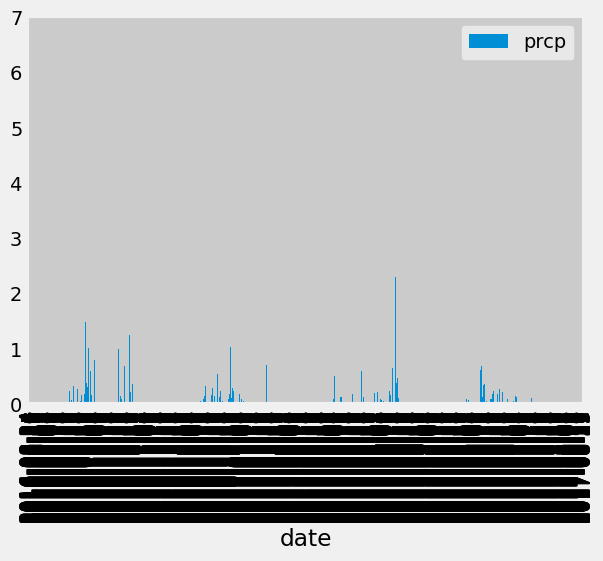

In [30]:

ticks = []
for i in range(12):
    date = dt.date(2016,8,23) + dt.timedelta(days  = i*30)
    ticks.append(date)
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(kind='bar',y='prcp')

In [31]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [49]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Measurement.station).group_by(Measurement.station).count()
print(station_count)

9


In [52]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station))\
.group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(station_activity)


[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
USC00519281


In [57]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = station_activity[0][0]
session.query(Measurement.station == active_station, Measurement.tobs).all()

[(False, 65.0),
 (False, 63.0),
 (False, 74.0),
 (False, 76.0),
 (False, 73.0),
 (False, 70.0),
 (False, 64.0),
 (False, 68.0),
 (False, 73.0),
 (False, 64.0),
 (False, 61.0),
 (False, 66.0),
 (False, 65.0),
 (False, 68.0),
 (False, 64.0),
 (False, 72.0),
 (False, 66.0),
 (False, 66.0),
 (False, 69.0),
 (False, 67.0),
 (False, 67.0),
 (False, 71.0),
 (False, 67.0),
 (False, 76.0),
 (False, 68.0),
 (False, 72.0),
 (False, 70.0),
 (False, 67.0),
 (False, 66.0),
 (False, 67.0),
 (False, 69.0),
 (False, 67.0),
 (False, 67.0),
 (False, 64.0),
 (False, 69.0),
 (False, 73.0),
 (False, 73.0),
 (False, 69.0),
 (False, 69.0),
 (False, 69.0),
 (False, 71.0),
 (False, 61.0),
 (False, 69.0),
 (False, 63.0),
 (False, 64.0),
 (False, 65.0),
 (False, 67.0),
 (False, 68.0),
 (False, 65.0),
 (False, 76.0),
 (False, 75.0),
 (False, 66.0),
 (False, 70.0),
 (False, 72.0),
 (False, 73.0),
 (False, 70.0),
 (False, 71.0),
 (False, 72.0),
 (False, 72.0),
 (False, 69.0),
 (False, 70.0),
 (False, 73.0),
 (False,

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [17]:
# Close Session
session.close()